<a href="https://colab.research.google.com/github/TheGuyCheese/IBM_Attrition_DataAnalysis_and_Prediction/blob/main/IBM_Attrition_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heliverse Assignment
## AI & ML Role - Python Programming
Objective:
This assignment aims to evaluate your proficiency in Python programming and your understanding of key concepts in artificial intelligence (AI) and machine learning (ML).


## Importing Libraries and Dataset

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, f1_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sys
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [62]:
df=pd.read_csv('IBM.csv')

In [63]:
#observing the dataset 10 entries
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [64]:
#observing the datatypes of the columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [65]:
#analysing the data description i.e., count, mean, min, max, etc of the various features in the dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [66]:
#listing out all the categorical features of the dataset
df.describe(include=['O']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [67]:
#now checking for any null values in the dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [68]:
attrition_counts= df['Attrition'].value_counts()
attrition_counts

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## Let's Explore the Data a little bit

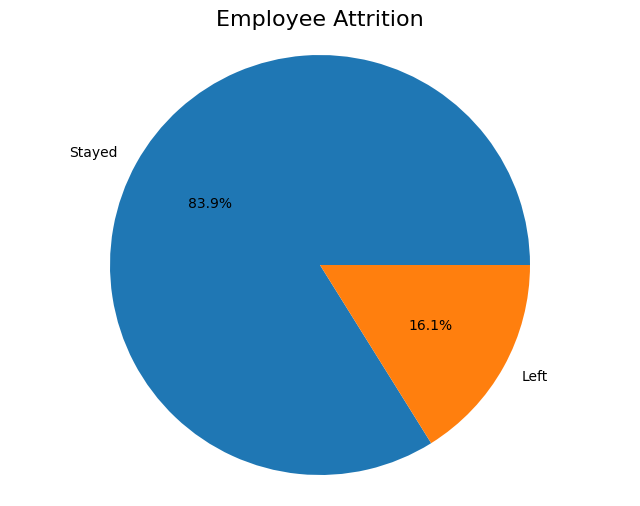

In [69]:
#drawing a pie chart graph for Left and Stayed Attrition
plt.figure(figsize=(8,6))
plt.pie(attrition_counts, labels=['Stayed', 'Left'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Employee Attrition', fontsize=16)
plt.show()

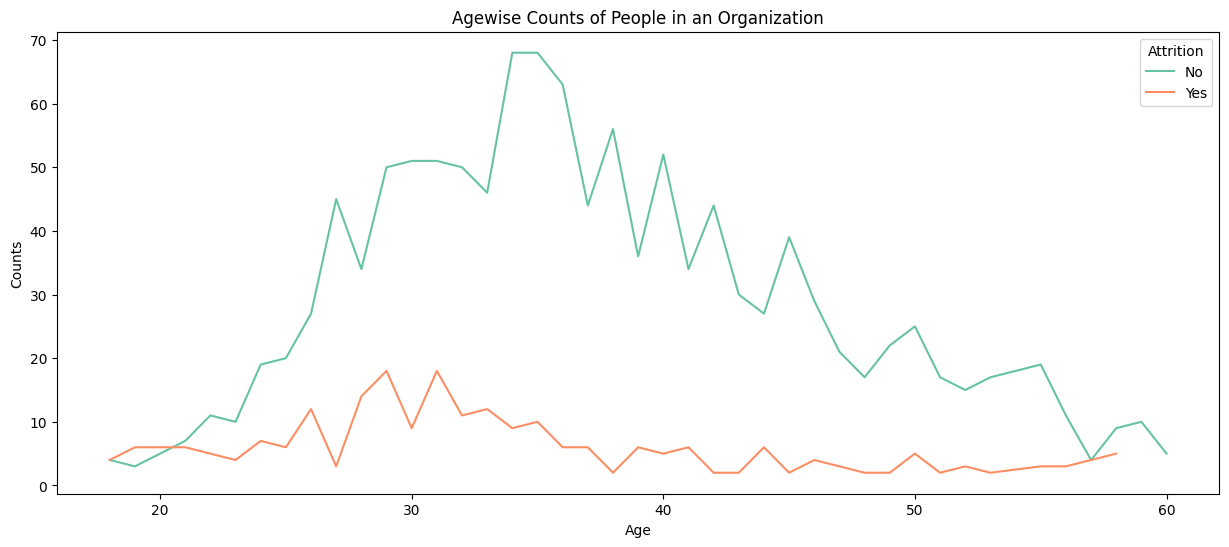

In [70]:
# Convert 'Attrition' to a string for grouping
df['Attrition'] = df['Attrition'].astype(str)

# Group the data by 'Age' and 'Attrition' and count the occurrences
age_attrition = df.groupby(['Age', 'Attrition']).size().reset_index(name='Counts')

# Create a line plot using seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=age_attrition, x='Age', y='Counts', hue='Attrition', palette='Set2')
plt.title('Agewise Counts of People in an Organization')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

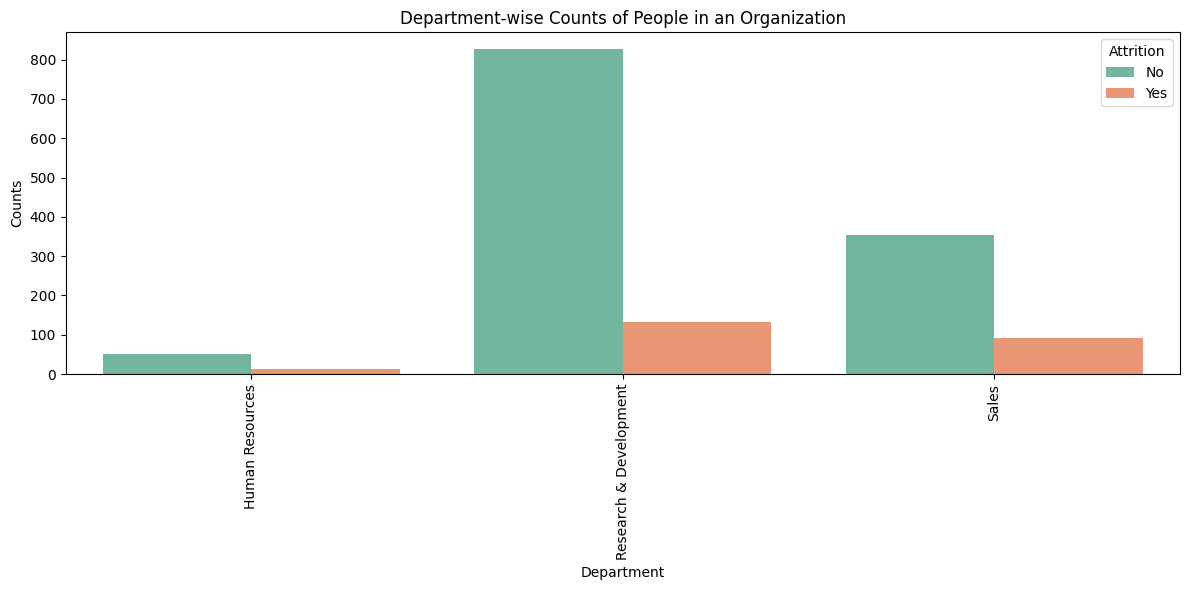

In [71]:
df['Attrition'] = df['Attrition'].astype(str)

# Group the data by 'Department' and 'Attrition' and count the occurrences
dept_attrition = df.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=dept_attrition, x='Department', y='Counts', hue='Attrition', palette='Set2')

plt.title('Department-wise Counts of People in an Organization')
plt.xlabel('Department')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

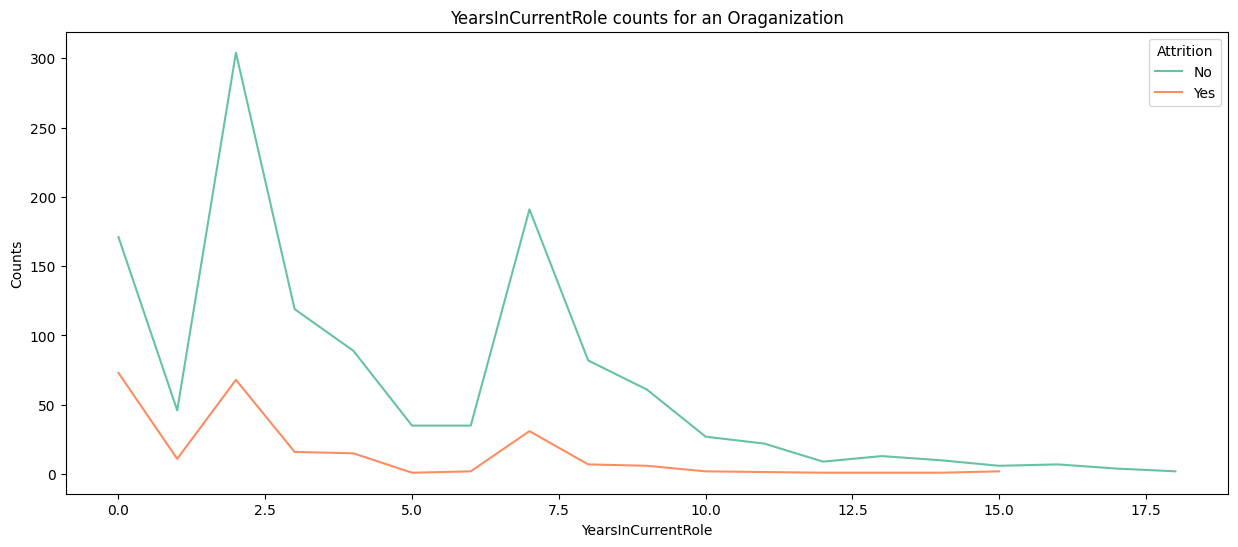

In [72]:
df['Attrition'] = df['Attrition'].astype(str)

age_attrition = df.groupby(['YearsInCurrentRole', 'Attrition']).size().reset_index(name='Counts')

# Create a line plot using seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=age_attrition, x='YearsInCurrentRole', y='Counts', hue='Attrition', palette='Set2')
plt.title('YearsInCurrentRole counts for an Oraganization')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Counts')
plt.show()

## Feature Engineering

In [73]:
#function to print number of unique values in the dataset
for column in df.columns:
  print(f"{column} = {df[column].nunique()}")

Age = 43
Attrition = 2
BusinessTravel = 3
DailyRate = 886
Department = 3
DistanceFromHome = 29
Education = 5
EducationField = 6
EmployeeCount = 1
EmployeeNumber = 1470
EnvironmentSatisfaction = 4
Gender = 2
HourlyRate = 71
JobInvolvement = 4
JobLevel = 5
JobRole = 9
JobSatisfaction = 4
MaritalStatus = 3
MonthlyIncome = 1349
MonthlyRate = 1427
NumCompaniesWorked = 10
Over18 = 1
OverTime = 2
PercentSalaryHike = 15
PerformanceRating = 2
RelationshipSatisfaction = 4
StandardHours = 1
StockOptionLevel = 4
TotalWorkingYears = 40
TrainingTimesLastYear = 7
WorkLifeBalance = 4
YearsAtCompany = 37
YearsInCurrentRole = 19
YearsSinceLastPromotion = 16
YearsWithCurrManager = 18


In [74]:
#changing Attribution values to 1 and 0 for yes and no
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [75]:
#dropping not so useful features from the dataset
df.drop(['EmployeeCount','Over18','StandardHours', 'EmployeeNumber'],axis=1,inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [76]:
#observing the features with categorical data
df.dtypes[df.dtypes=='object'].index.tolist()

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [77]:
#seperating all the numeric data and the categorical data
numeric_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])

In [78]:
for column in categorical_data.columns:
  print(f"{column} = {df[column].nunique()}")

BusinessTravel = 3
Department = 3
EducationField = 6
Gender = 2
JobRole = 9
MaritalStatus = 3
OverTime = 2


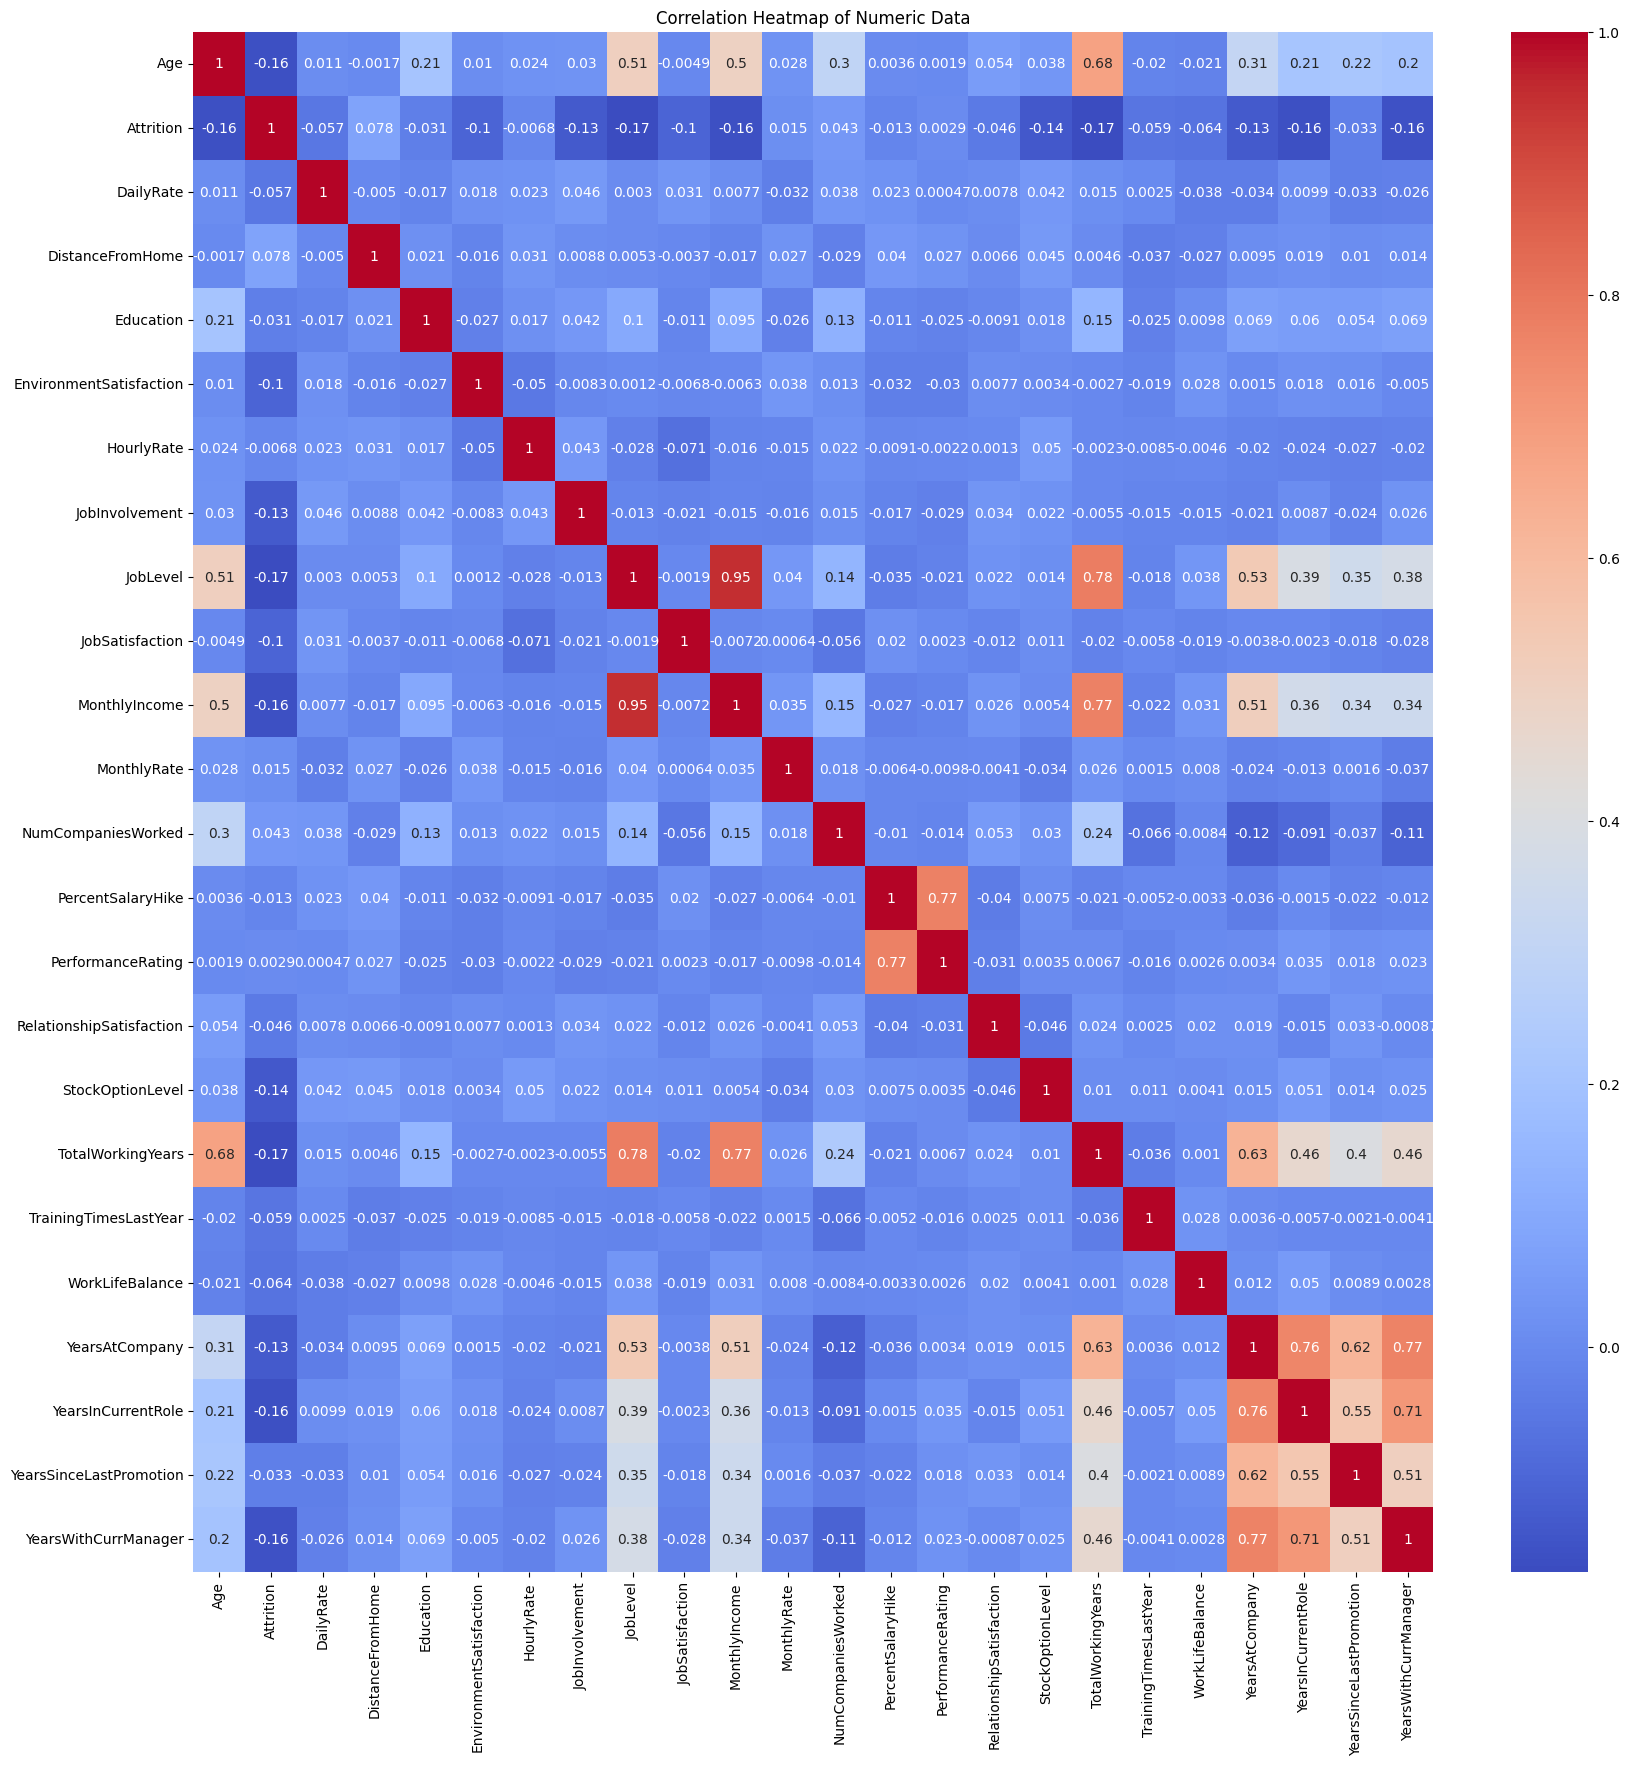

In [79]:
#drawing correlation heatmap of the numeric part of the dataset
plt.figure(figsize=(20,20))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Data')
plt.show()

In [80]:
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
df = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,41,1,1102,1,94,5993,19479,8,6,0,...,0,0,0,0,0,0,0,0,0,0
1,49,0,279,8,61,5130,24907,10,10,1,...,0,0,0,0,0,0,0,0,0,0
2,37,1,1373,2,92,2090,2396,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33,0,1392,3,56,2909,23159,8,8,1,...,0,0,0,0,0,0,0,0,0,0
4,27,0,591,2,40,3468,16632,6,2,0,...,0,0,0,0,0,0,0,0,0,0


## Building the Model

In [81]:
X = df.drop('Attrition', axis=1)
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [82]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [83]:
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
0,-1.958919,-0.413973,-0.036578,-0.547908,-0.867017,-1.009049,-1.343310,-0.998443,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
1,-0.430695,1.176070,0.699024,-0.449557,1.532088,1.404772,0.478372,0.010293,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
2,1.643324,1.296833,0.208623,0.829007,-0.737494,1.017664,-0.302349,-0.325952,-0.468182,0.636975,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
3,-1.085648,-0.549831,-0.894779,1.074884,-0.860942,-1.130107,-0.692709,-0.494075,2.135922,-1.569919,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247
4,-0.321536,-1.274408,-0.894779,0.484778,-0.936660,-0.435997,-0.692709,-0.494075,2.135922,-1.569919,...,-0.292306,-0.208831,-0.140789,-0.125677,-0.121626,-0.088518,-0.06247,-0.04413,-0.031189,-0.06247


In [84]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    XGBClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier()
]

model_names = [
    'LogisticRegression',
    'RandomForestClassifier',
    'SVC',
    'XGBClassifier',
    'DecisionTreeClassifier',
    'GaussianNB',
    'KNeighborsClassifier'
]

In [85]:
accuracy = []
roc_auc = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

model_comparison = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy,
    'ROC AUC': roc_auc
})
model_comparison.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy,ROC AUC
2,SVC,0.854875,0.554987
3,XGBClassifier,0.852608,0.621926
0,LogisticRegression,0.848073,0.676132
1,RandomForestClassifier,0.839002,0.534145
6,KNeighborsClassifier,0.823129,0.553140
4,DecisionTreeClassifier,0.800454,0.596536
5,GaussianNB,0.242630,0.531576


In [86]:
#hyperparameter tuning for all the models used above
hyperparameters = [
    {'penalty': ['l1', 'l2'], 'C': uniform(0.001, 10)},
    {'n_estimators': randint(10, 100), 'max_features': ['auto', 'sqrt', 'log2']},
    {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': uniform(0.001, 10)},
    {'max_depth': randint(3, 10)},
    {'criterion': ['gini', 'entropy'], 'max_depth': randint(3, 10)},
    {},  # GaussianNB has no hyperparameters to tune
    {'n_neighbors': randint(1, 15), 'weights': ['uniform', 'distance']}
]
#calculates best model parameters for each of the model
for model, params in zip(models, hyperparameters):
    clf = RandomizedSearchCV(model, params, n_iter=10, cv=5, random_state=42, n_jobs=-1, verbose=1)
    best_model = clf.fit(X_train, y_train)
    print(f"Best Model: {best_model.best_estimator_}")
    print(f"Best Score: {best_model.best_score_}")
    print(f"Best Parameters: {best_model.best_params_}")
    print("-" * 50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Model: LogisticRegression(C=0.5651157902710026)
Best Score: 0.8581292919725314
Best Parameters: {'C': 0.5651157902710026, 'penalty': 'l2'}
--------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Model: RandomForestClassifier(max_features='auto', n_estimators=33)
Best Score: 0.8610371773620649
Best Parameters: {'max_features': 'auto', 'n_estimators': 33}
--------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Model: SVC(C=3.338086111390218, kernel='sigmoid')
Best Score: 0.8746483542505328
Best Parameters: {'C': 3.338086111390218, 'kernel': 'sigmoid'}
--------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_thres

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Model: KNeighborsClassifier(n_neighbors=8)
Best Score: 0.8425668955718683
Best Parameters: {'n_neighbors': 8, 'weights': 'uniform'}
--------------------------------------------------


In [87]:
#training and comparing models with tuned hyperparameters
models = [
   LogisticRegression(C=0.001, penalty='l2'),
   RandomForestClassifier(max_features='auto'),
   SVC(C=0.001, kernel='linear'),
   XGBClassifier(learning_rate=0.1, n_estimators=100),
   DecisionTreeClassifier(),
   GaussianNB(),
   KNeighborsClassifier()
]

model_names = [
   'Logistic Regression',
   'Random Forest',
   'SVC',
   'XGBoost',
   'Decision Tree',
   'Gaussian Naive Bayes',
   'K-Nearest Neighbors'
]


accuracy = []
roc_auc = []
f1_scr = []
confusion_met = []

for model in models:
   model.fit(X_train, y_train)
   y_pred = model.predict(X_test)
   accuracy.append(accuracy_score(y_test, y_pred))
   roc_auc.append(roc_auc_score(y_test, y_pred))
   f1_scr.append(f1_score(y_test, y_pred))

   confusion_met.append(confusion_matrix(y_test, y_pred))

model_comparison = pd.DataFrame({
   'Model': model_names,
   'Accuracy': accuracy,
   'ROC AUC': roc_auc,
   'F1 Score': f1_scr
})
model_comparison.sort_values(by='Accuracy', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,Model,Accuracy,ROC AUC,F1 Score
3,XGBoost,0.863946,0.640065,0.423077
1,Random Forest,0.843537,0.542539,0.168675
0,Logistic Regression,0.839002,0.500000,0.000000
2,SVC,0.839002,0.500000,0.000000
6,K-Nearest Neighbors,0.823129,0.553140,0.220000
4,Decision Tree,0.777778,0.577332,0.289855
5,Gaussian Naive Bayes,0.242630,0.531576,0.289362


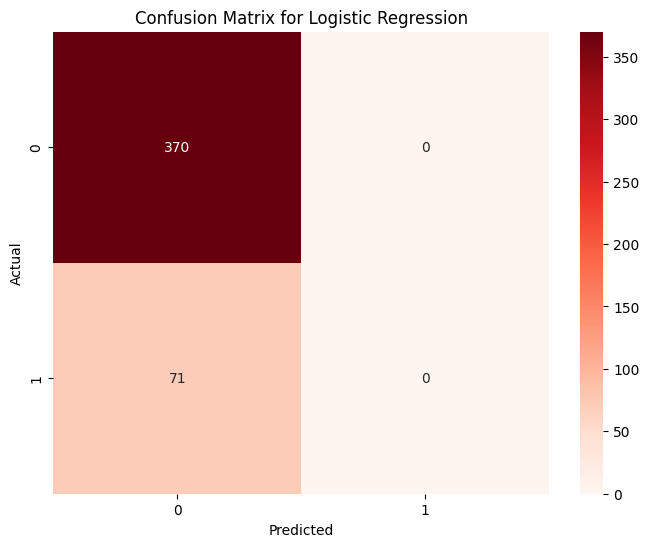

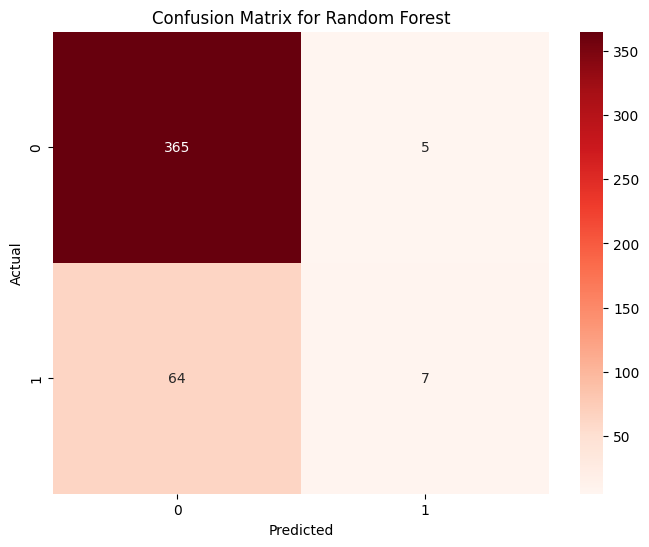

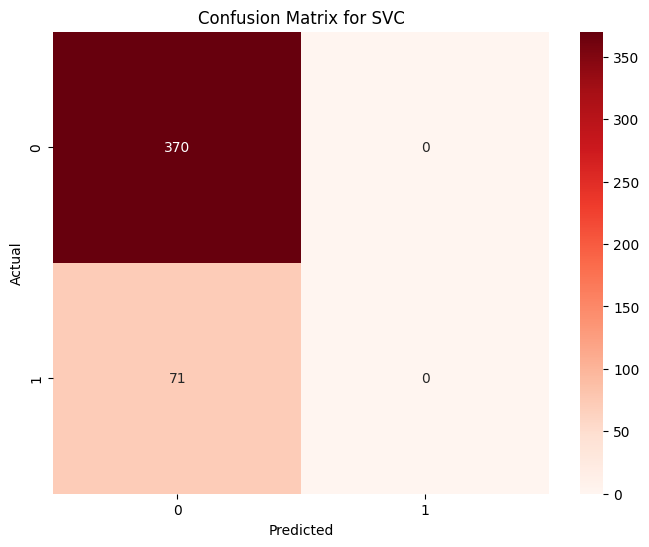

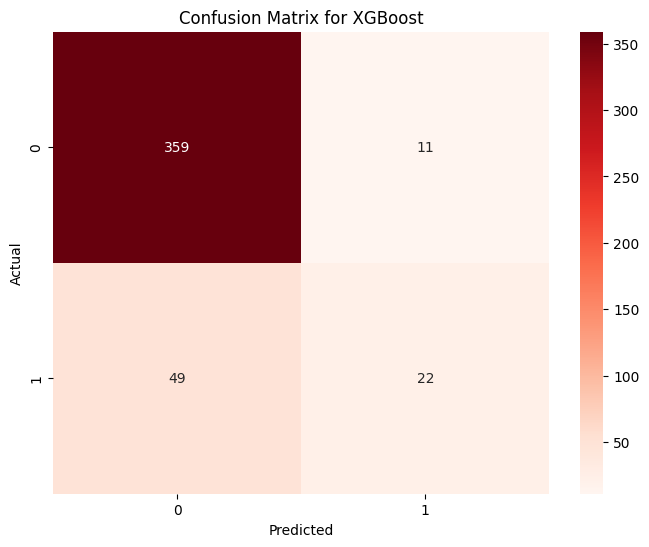

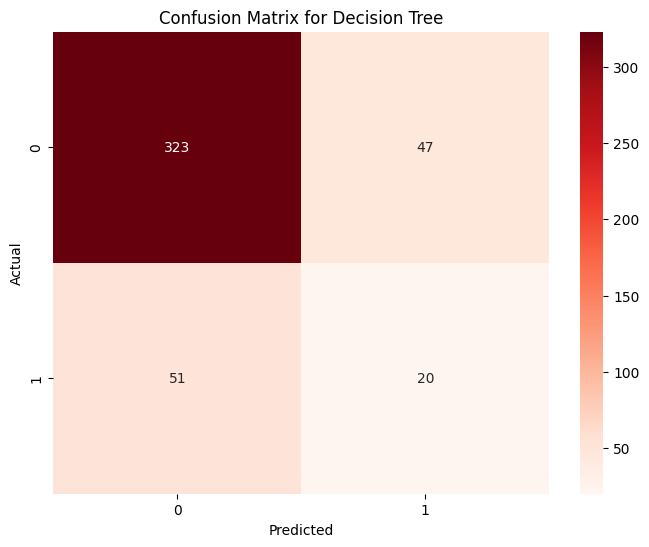

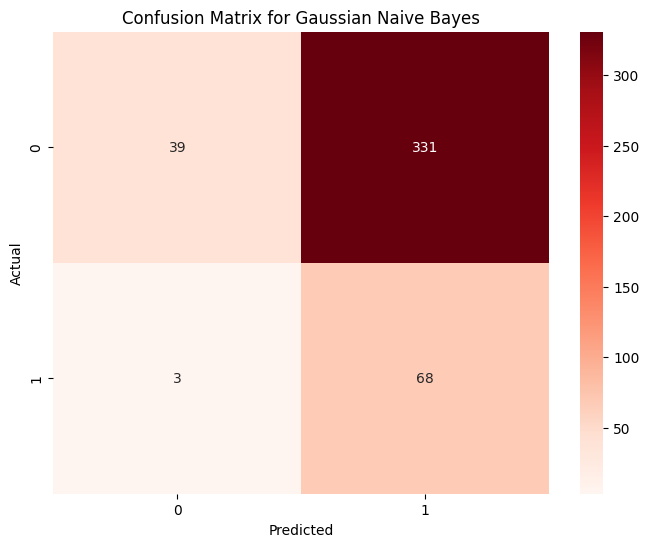

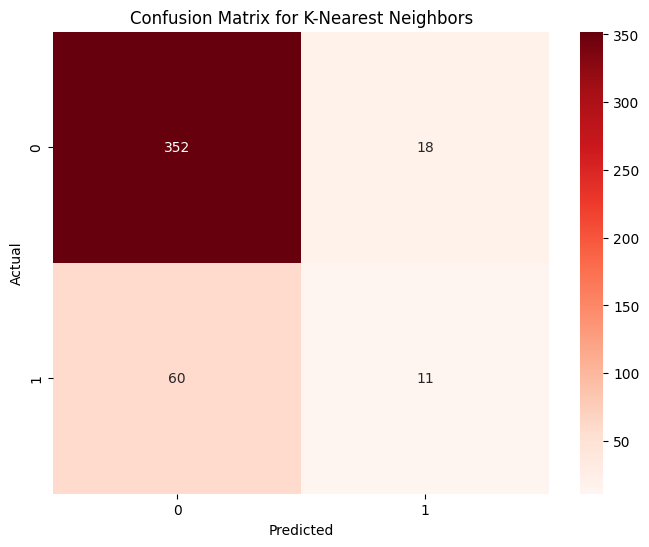

In [88]:
#generating confusion matrix for the results
for i, (name, conf_mat) in enumerate(zip(model_names, confusion_met)):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()